# 첫 번째 신경망 훈련하기: 기초적인 분류 문제

## 기본 : 이미지 분류

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.5.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(tr_img, tr_cls), (te_img, te_cls) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
type(tr_img), type(tr_cls), type(te_img), type(te_cls)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

#### 데이터가 모두 넘파이 배열로 이루어 진 것을 알 수 있다.

In [13]:
tr_img[0].max(), tr_img[0].min(), te_img[0].max(), te_img[0].min()

(255, 0, 255, 0)

#### 데이터의 픽셀 값은 0 ~ 255 사이다. 이는 RGB채널의 최댓값이 255이기 때문이다.

In [16]:
np.unique(tr_cls), np.unique(te_cls)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

#### 예측 대상인 이미지의 클래스는 0 ~ 9사이의 정수 값이다.

In [17]:
tr_img.shape, te_img.shape

((60000, 28, 28), (10000, 28, 28))

#### train 데이터는 60,000장이고 test 데이터는 10,000장이다.

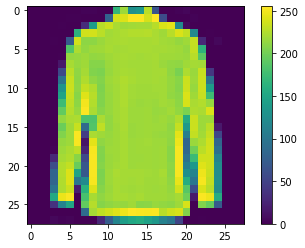

In [18]:
plt.imshow(tr_img[2021])
plt.colorbar()
plt.show()

In [21]:
tr_img = tr_img / 255.0
te_img = te_img / 255.0

#### 신경망은 input 값이 0 ~ 1 사이일 때 성능이 좋으므로 최댓값인 255로 나누어 준다. 단, train 데이터에 적용한 전처리 방식을 그대로 test 데이터에 적용해야한다.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [24]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'swish'))
model.add(Dense(10, activation = 'softmax'))

#### 모델의 첫 번째 층은 Flatten은 28 x 28 2차원 배열을 28 * 28 = 784 픽셀의 1차원 배열로 변환한다. 

#### 두 번째 층에 input이 전달될 때 128개의 노드를 가진 값이 전달된다.

#### 마지막 층은 최종 예측값을 출력하는 것으로 우리가 예측할 데이터의 클래스 개수는 10개이므로 10개노드에 대해 출력하고 softmax 활성화 함수를 사용한다. 



In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

#### 모델을 학습시키기 전에 **손실 함수**, **옵티마이저**, **지표**를 설정해야한다.

In [27]:
model.fit(tr_img, tr_cls, epochs = 10, validation_split = 0.2, batch_size = 64)

Epoch 1/10
750/750 [==============================] - 5s 3ms/step - loss: 0.5381 - acc: 0.8151 - val_loss: 0.4877 - val_acc: 0.8251
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3989 - acc: 0.8573 - val_loss: 0.3926 - val_acc: 0.8589
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3521 - acc: 0.8727 - val_loss: 0.3661 - val_acc: 0.8675
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3236 - acc: 0.8824 - val_loss: 0.3422 - val_acc: 0.8758
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3028 - acc: 0.8891 - val_loss: 0.3431 - val_acc: 0.8733
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2864 - acc: 0.8928 - val_loss: 0.3349 - val_acc: 0.8792
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2706 - acc: 0.8996 - val_loss: 0.3436 - val_acc: 0.8808
Epoch 8/10
750/750 [==============================] - 2s 2ms/step - loss: 0.

#### validation_split은 모델에 사용된 학습데이터 중에서 일정 비율을 validation용으로 사용한다. 

In [29]:
te_loss, te_acc = model.evaluate(te_img, te_cls, verbose = 0)

In [30]:
print(f"테스트 loss = {te_loss} / 테스트 acc = {te_acc}")

테스트 loss = 0.3545226454734802 / 테스트 acc = 0.8779000043869019


#### 테스트 데이터의 성능이 학습 데이터에서 보다 낮은 것을 알 수 있다.

#### 다양한 이유로 모델의 과대적합이 발생할 수 있고 과대적합이 발생하면 성능이 안좋다.

In [31]:
pred = model.predict(te_img)

In [33]:
pred_cls = [np.argmax(p) for p in pred]

In [35]:
pred_cls[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]